In [12]:
%matplotlib widget 
#This line can be deleted but it's just to allow nicer plots

import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_color_value,
    reconstruct_image_from_general,
    plot_full,
    find_nearest_edge,
)

import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)

import pandas as pd

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
    Edge,
    Hyphae,
)
from datetime import datetime
from matplotlib import cm
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
import networkx as nx
from amftrack.pipeline.functions.post_processing.exp_plot import *

In [4]:
directory_targ = '/projects/0/einf914/data/'

In [5]:
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/3345 [00:00<?, ?it/s]

In [6]:
folders = all_folders.loc[all_folders["unique_id"] == "1045_20220504"] 
#here select the plate you're interested in
folders = folders.sort_values(by="datetime")
#here select the timesteps you're interested in
folders = folders.iloc[60:62]
folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp,unique_id,datetime
1996,/projects/0/einf914/data/20220509_2336_Plate02,1045,2,'Carrot','C2','001P100N200C','Y','-',20220504,25,...,False,True,True,True,True,"09.05.2022, 23:36:",20220509_2336_Plate02,NaN,1045_20220504,2022-05-09 23:36:00
2759,/projects/0/einf914/data/20220510_0136_Plate02,1045,2,'Carrot','C2','001P100N200C','Y','-',20220504,25,...,False,True,True,True,True,"10.05.2022, 01:36:",20220510_0136_Plate02,NaN,1045_20220504,2022-05-10 01:36:00


In [7]:
#load the experiment object
exp = Experiment(directory_targ)
exp.load(folders)
exp.dates.sort()
for t in range(len(folders)):
    exp.load_tile_information(t)

2022-05-09 23:36:00
2022-05-10 01:36:00


In [ ]:
#chose a timestep
t = 0

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


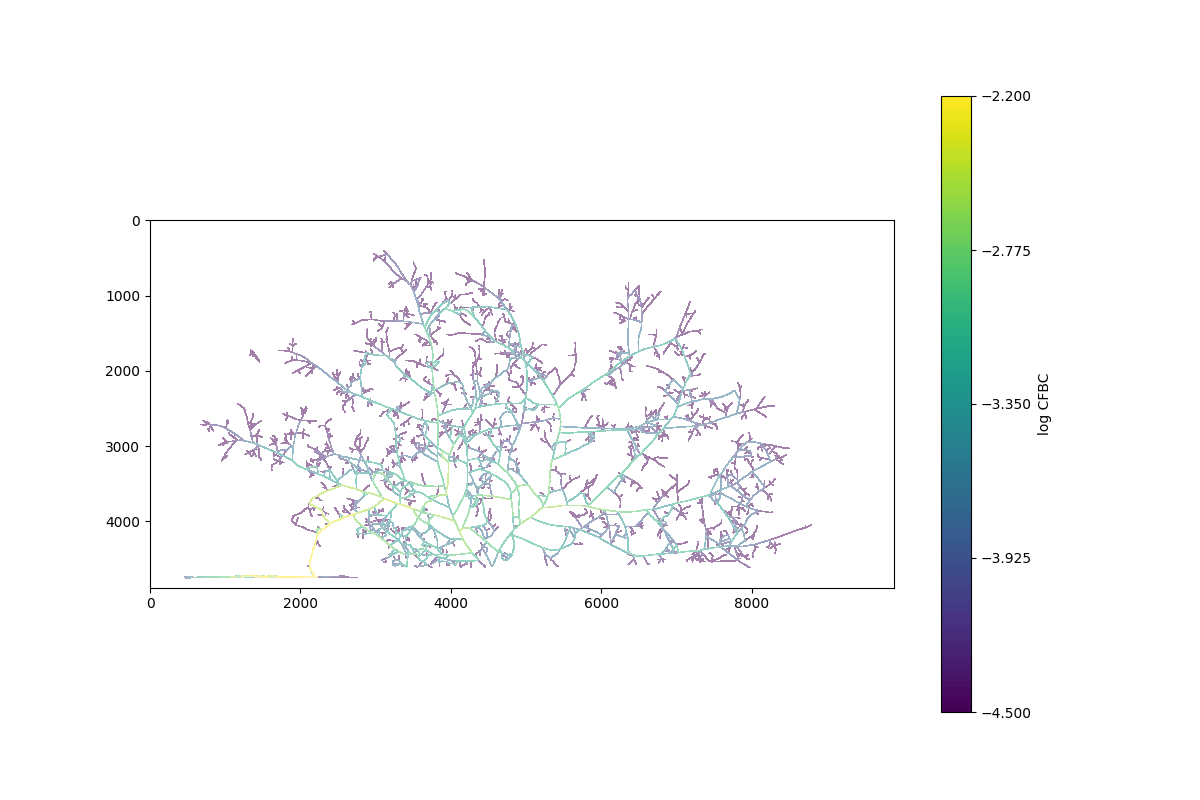

In [8]:
plt.close("all")
vmax = -2.2
vmin = -4.5
ax = plot_edge_color_value(
    exp,
    t,
    lambda edge: np.log10(edge.current_flow_betweeness(t)),
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=20,
    figsize=(12, 8),
    label_colorbar="log CFBC",
)

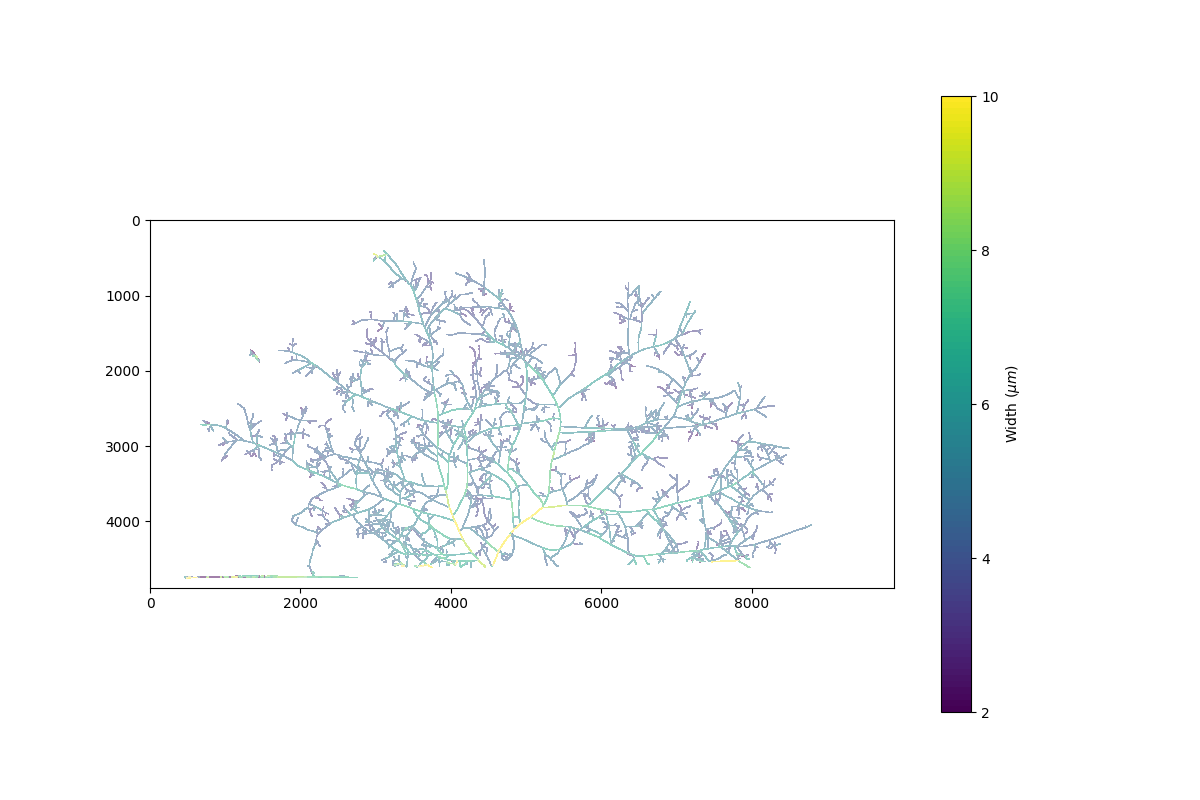

<AxesSubplot:>

In [9]:
vmax = 10
vmin = 2
plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.width(t),
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=20,
    figsize=(12, 8),
)
# path = r"/scratch-shared/amftrack/transport/full_picture/"
# file_name = f'width.png'
# save_path = os.path.join(path,file_name)
# plt.savefig(save_path, dpi=dpi)

***Get the network_x object of a given timestep t***

In [14]:
nx_graph,pos = exp.nx_graph[t],exp.positions[t]
cycle_basis = nx.cycle_basis(nx_graph) #example of a nx graph function

***Work with class Node and edge***

In [16]:
node = exp.nodes[12]
edges = exp.nodes[12].edges(t)
width = [edge.width(t) for edge in edges]
centrality = [np.log10(edge.current_flow_betweeness(t)) for edge in edges if edge.width(t)>0]